<a href="https://colab.research.google.com/github/omanshuthapliyal/ML2Coursework/blob/master/minst_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import necessary packages
from IPython.display import clear_output
import numpy as np
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from time import sleep
import matplotlib.pyplot as plt
from keras import backend as K

Using TensorFlow backend.


# Load Data

In [0]:
#Load MNIST data and normalize to [-1, 1]
(data_train, labels_train), (data_test, labels_test) = mnist.load_data()
data_train = 2*(data_train/255.0 - 0.5)
data_test = 2*(data_test/255.0 - 0.5)
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)
#Reshape training and testing data into 784-dimensional vectors
try:
  d = data_train.shape[1]
  data_train = data_train.reshape((data_train.shape[0], 
                                  d*d))
  data_test = data_test.reshape((data_test.shape[0], 
                               d*d))
except:
  print("training data shape: ", data_train.shape)
  print("testing data shape: ", data_test.shape)
  print("Data was reshaped already")

nClasses = 10

11493376/11490434 [==============================] - 0s 0us/step


# Creating CNN Model

In [0]:
def nnModel():
  model = Sequential()
  model.add(Dense(35,input_dim=data_test.shape[1],
                activation="relu") )
  model.add(Dense(45, activation="relu", 
                  kernel_initializer = "uniform") )
  model.add(Dense(60, activation="relu", 
                  kernel_initializer = "uniform") )
  model.add(Dense(30, activation="relu", 
                  kernel_initializer = "uniform") )
  model.add(Dense(60, activation="relu", 
                  kernel_initializer = "uniform") )
  model.add(Dense(50, activation="relu",
                  kernel_initializer = "uniform") )
  model.add(Dense(30, activation="relu", 
                  kernel_initializer = "uniform") )
  model.add(Dense(65, activation="relu", 
                  kernel_initializer = "uniform") )
  model.add(Dense(25, activation="relu", 
                  kernel_initializer = "uniform") )
  model.add(Dense(nClasses, activation = 'softmax'))  
  return model

## Callback for grabbing outputs from each layer

In [0]:
def activationPlotter(layer_outs, ax):
  ax.clear()
  layerNum = 0
  for layers in layer_outs:
    layerLength = layers.shape[1]
    y_vec = np.arange(0, layerLength, 1)
    y_vec = y_vec - layerLength/2
    y_vec = y_vec.reshape((1,layerLength))
    activeUnits = (layers > 0).sum()
    inativeUnits = layerLength - activeUnits
    x = np.repeat(layerNum, layerLength)
    x = x.reshape((1,layerLength))
    # clear_output()
    plt.scatter(x[layers <= 0],
                y_vec[layers <= 0], 
                s=35, facecolors='none', edgecolors='r')
    plt.scatter(x[layers > 0],
                y_vec[layers > 0], 
                s=35, facecolors='g', edgecolors='g')
    string = "%0.2f%%" %(100*activeUnits/layerLength)
    ax.text(x[0,0]-0.225, y_vec.max()+2, string, fontsize=15)
    layerNum += 1
  ax.set_facecolor('beige')
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  plt.show()
  sleep(1)

layerOutputs = list()

class grabsActivation(keras.callbacks.Callback):
  
  def on_predict_batch_end(self, batch, logs = None):

    inp = model.input                                           # input placeholder
    outputs = [layer.output for layer in model.layers]          # all layer outputs
    functor = K.function([inp, K.learning_phase()], outputs )   # evaluation function

    # Testing
    test = np.random.random(data_test.shape[1])[np.newaxis,...]
    layer_outs = functor([test, 1.])
    layerOutputs.append(layer_outs)
    

## Training model

In [0]:
model = nnModel()
model.compile(loss='categorical_crossentropy',
                  optimizer = "adam", 
                  metrics = ['accuracy'])
print(model.summary())

model_metaData = model.fit(data_train, labels_train,
                           validation_data = (data_test, labels_test), 
                           epochs = 100, batch_size = 512, 
                           shuffle = True, verbose=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 35)                27475     
_________________________________________________________________
dense_12 (Dense)             (None, 45)                1620      
_________________________________________________________________
dense_13 (Dense)             (None, 60)                2760      
_________________________________________________________________
dense_14 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_15 (Dense)             (None, 60)                1860      
_________________________________________________________________
dense_16 (Dense)             (None, 50)                3050      
_________________________________________________________________
dense_17 (Dense)             (None, 30)               

In [0]:
scores = model.evaluate(data_test, labels_test, 
                        callbacks = [grabsActivation()],
                        batch_size = 1)
print("Accuracy: %0.4f%%" %(scores[1]*100) )

10000/10000 [==============================] - 9s 926us/step
Accuracy: 95.8100%


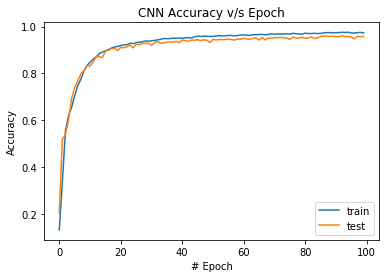

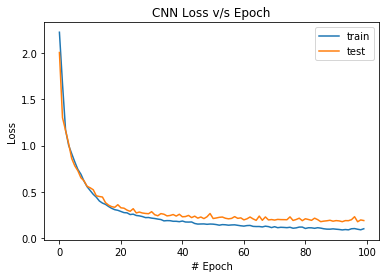

In [0]:
#Plot accuracy vs epoch
plt.plot(model_metaData.history['acc'])
plt.plot(model_metaData.history['val_acc'])
plt.title('CNN Accuracy v/s Epoch')
plt.xlabel('# Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()
#Plot loss vs epoch
plt.plot(model_metaData.history['loss'])
plt.plot(model_metaData.history['val_loss'])
plt.title('CNN Loss v/s Epoch')
plt.xlabel('# Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [0]:
model.predict(data_test[0:100,:], batch_size = 1, callbacks = [grabsActivation()])

array([[2.22960936e-16, 5.41549070e-06, 5.79957430e-07, 8.57050821e-08,
        7.44244915e-07, 2.44447518e-10, 3.55997848e-12, 9.99992728e-01,
        9.95374094e-09, 4.29534367e-07],
       [3.73727653e-06, 2.74641137e-03, 9.95090008e-01, 2.53444858e-04,
        7.59792456e-05, 1.63090415e-04, 4.00696503e-04, 1.23283511e-03,
        3.31932206e-05, 5.99968018e-07],
       [7.57420904e-19, 9.99718845e-01, 7.61779884e-09, 9.28203825e-09,
        1.39363146e-06, 2.91195922e-11, 4.37297814e-07, 8.64630128e-05,
        1.92302818e-04, 5.73150260e-07],
       [9.99224782e-01, 1.47927698e-10, 1.77706693e-06, 3.38378259e-09,
        8.68749412e-05, 6.71859880e-07, 6.85942767e-04, 3.22781180e-09,
        2.51754595e-09, 1.28768285e-08],
       [1.67958274e-06, 3.17480135e-06, 1.24636142e-06, 1.15989662e-08,
        9.99752462e-01, 7.80359599e-08, 1.81656131e-11, 9.01830717e-05,
        5.89324463e-06, 1.45372280e-04],
       [2.53368718e-26, 9.99993563e-01, 2.36335344e-12, 3.55044726e-12,
   

<Figure size 1440x1080 with 0 Axes>

Prediction # 1


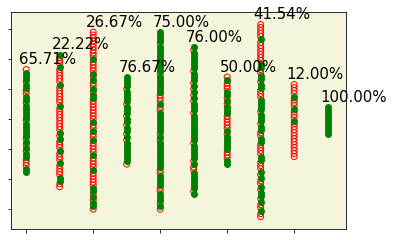

<Figure size 1440x1080 with 0 Axes>

Prediction # 2


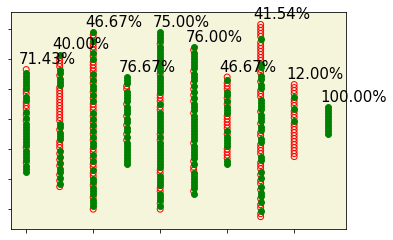

<Figure size 1440x1080 with 0 Axes>

Prediction # 3


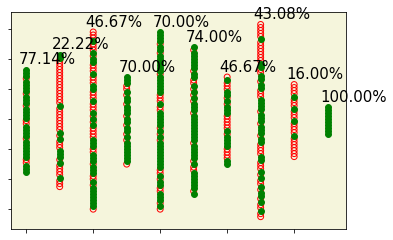

<Figure size 1440x1080 with 0 Axes>

Prediction # 4


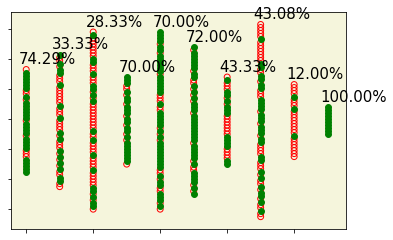

<Figure size 1440x1080 with 0 Axes>

Prediction # 5


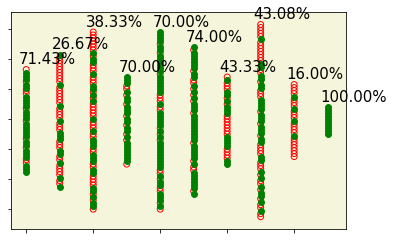

<Figure size 1440x1080 with 0 Axes>

Prediction # 6


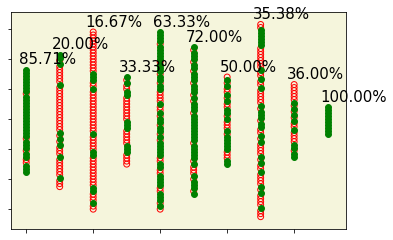

<Figure size 1440x1080 with 0 Axes>

Prediction # 7


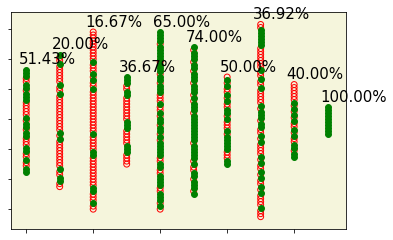

<Figure size 1440x1080 with 0 Axes>

Prediction # 8


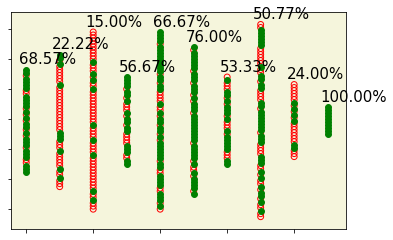

<Figure size 1440x1080 with 0 Axes>

Prediction # 9


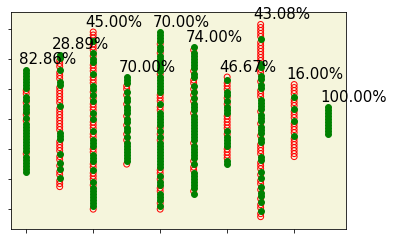

<Figure size 1440x1080 with 0 Axes>

Prediction # 10


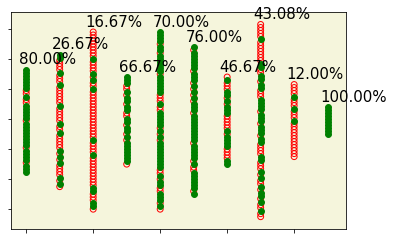

<Figure size 1440x1080 with 0 Axes>

Prediction # 11


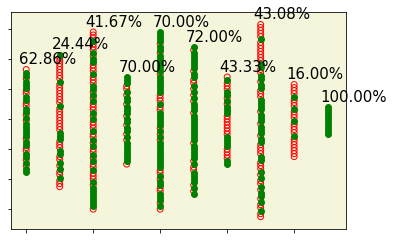

<Figure size 1440x1080 with 0 Axes>

Prediction # 12


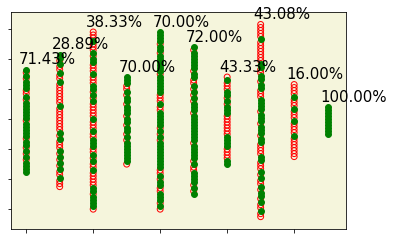

<Figure size 1440x1080 with 0 Axes>

Prediction # 13


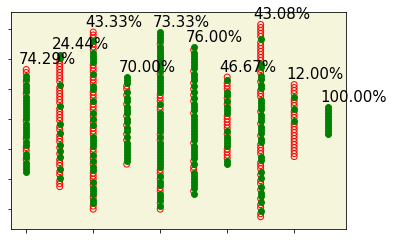

<Figure size 1440x1080 with 0 Axes>

Prediction # 14


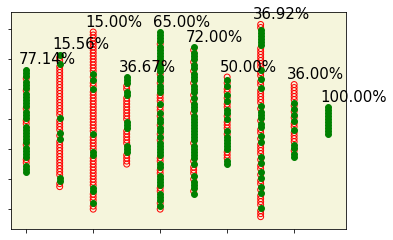

<Figure size 1440x1080 with 0 Axes>

Prediction # 15


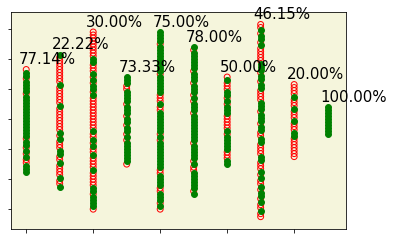

<Figure size 1440x1080 with 0 Axes>

Prediction # 16


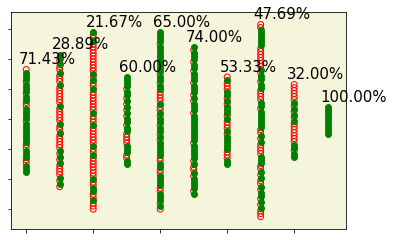

<Figure size 1440x1080 with 0 Axes>

Prediction # 17


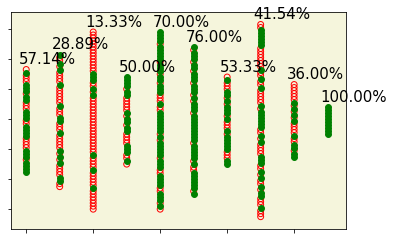

<Figure size 1440x1080 with 0 Axes>

Prediction # 18


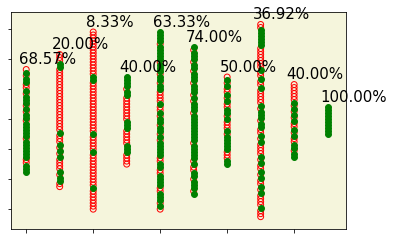

<Figure size 1440x1080 with 0 Axes>

Prediction # 19


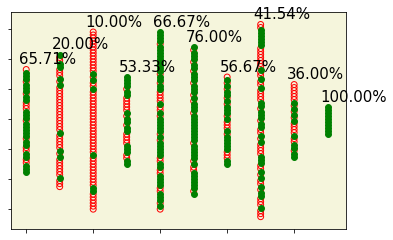

<Figure size 1440x1080 with 0 Axes>

Prediction # 20


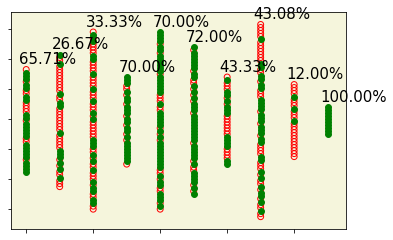

<Figure size 1440x1080 with 0 Axes>

Prediction # 21


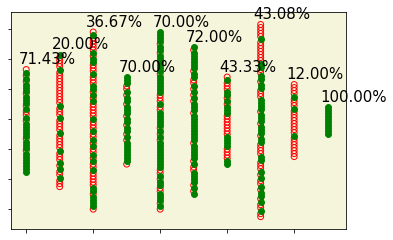

<Figure size 1440x1080 with 0 Axes>

Prediction # 22


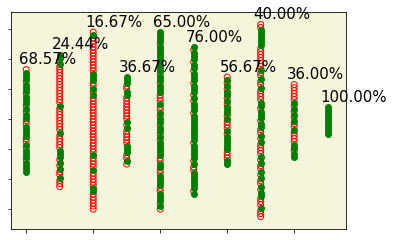

<Figure size 1440x1080 with 0 Axes>

Prediction # 23


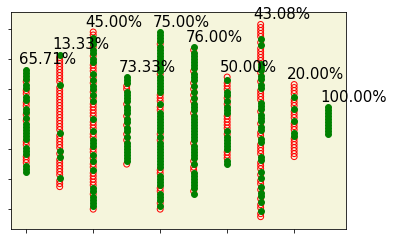

<Figure size 1440x1080 with 0 Axes>

Prediction # 24


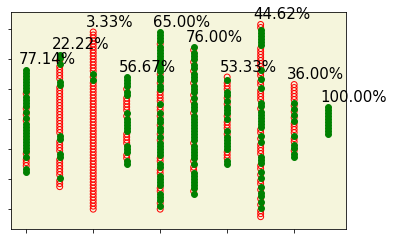

<Figure size 1440x1080 with 0 Axes>

Prediction # 25


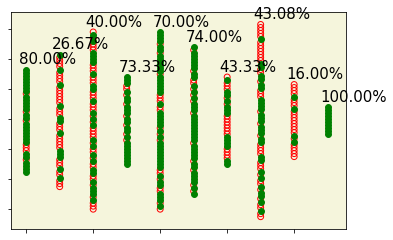

<Figure size 1440x1080 with 0 Axes>

Prediction # 26


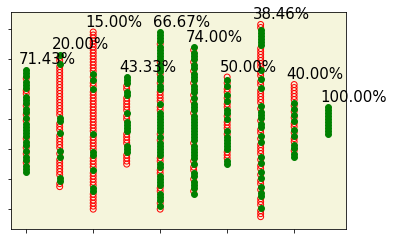

<Figure size 1440x1080 with 0 Axes>

Prediction # 27


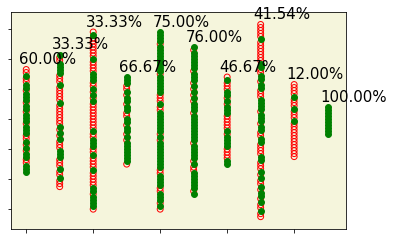

<Figure size 1440x1080 with 0 Axes>

Prediction # 28


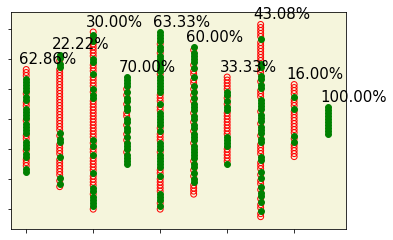

<Figure size 1440x1080 with 0 Axes>

Prediction # 29


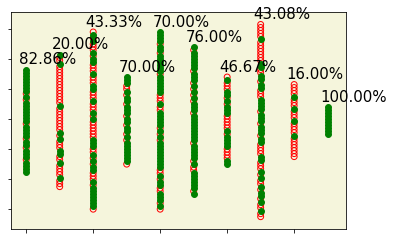

<Figure size 1440x1080 with 0 Axes>

Prediction # 30


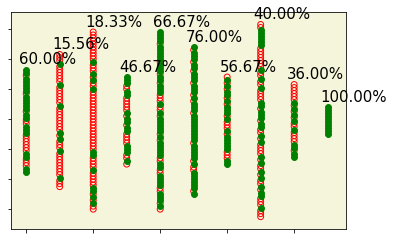

<Figure size 1440x1080 with 0 Axes>

Prediction # 31


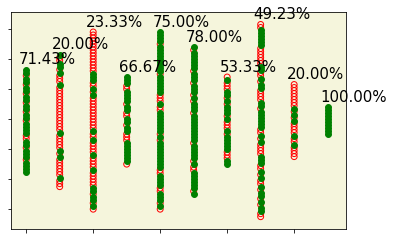

<Figure size 1440x1080 with 0 Axes>

Prediction # 32


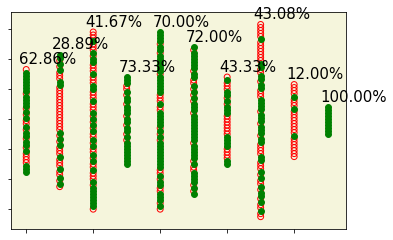

<Figure size 1440x1080 with 0 Axes>

Prediction # 33


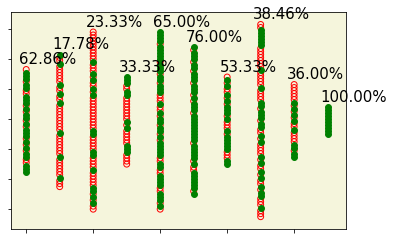

<Figure size 1440x1080 with 0 Axes>

Prediction # 34


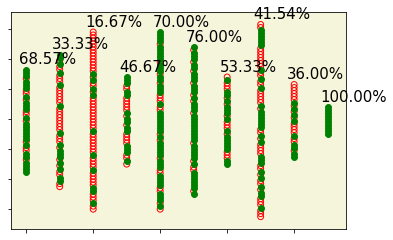

<Figure size 1440x1080 with 0 Axes>

Prediction # 35


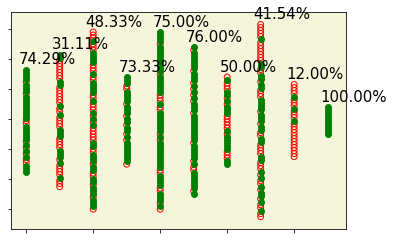

<Figure size 1440x1080 with 0 Axes>

Prediction # 36


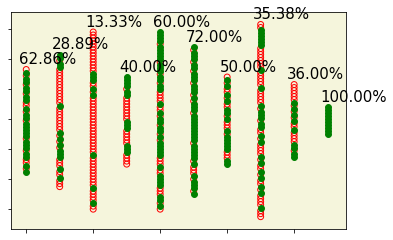

<Figure size 1440x1080 with 0 Axes>

Prediction # 37


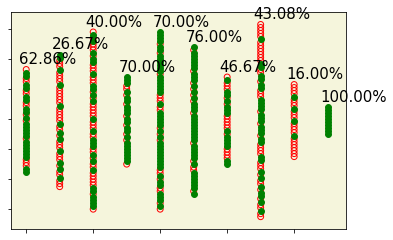

<Figure size 1440x1080 with 0 Axes>

Prediction # 38


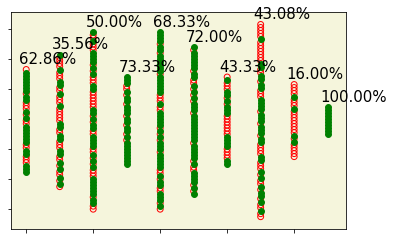

<Figure size 1440x1080 with 0 Axes>

Prediction # 39


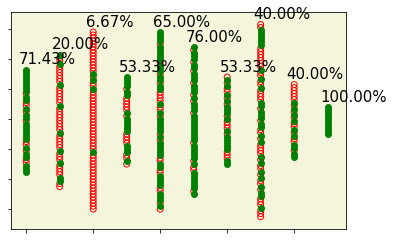

<Figure size 1440x1080 with 0 Axes>

Prediction # 40


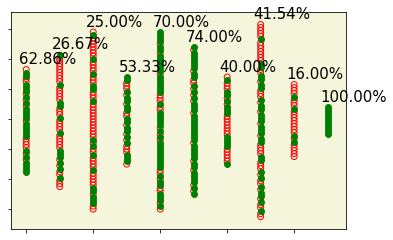

<Figure size 1440x1080 with 0 Axes>

Prediction # 41


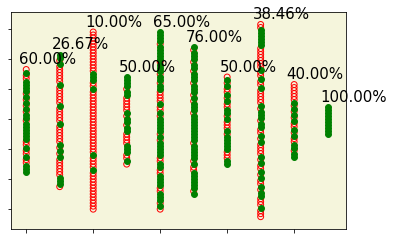

<Figure size 1440x1080 with 0 Axes>

Prediction # 42


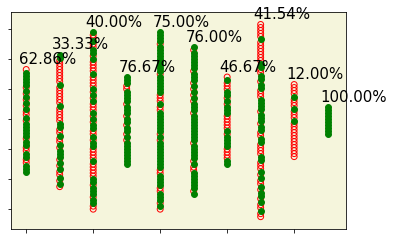

<Figure size 1440x1080 with 0 Axes>

Prediction # 43


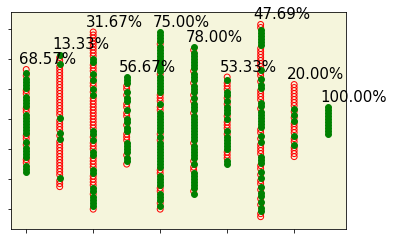

<Figure size 1440x1080 with 0 Axes>

Prediction # 44


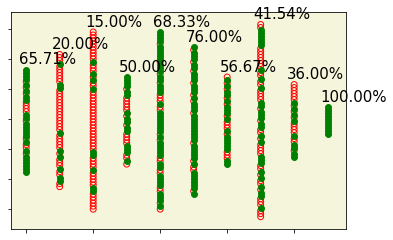

<Figure size 1440x1080 with 0 Axes>

Prediction # 45


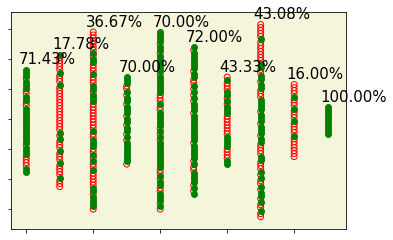

<Figure size 1440x1080 with 0 Axes>

Prediction # 46


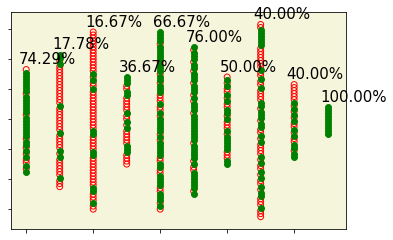

<Figure size 1440x1080 with 0 Axes>

Prediction # 47


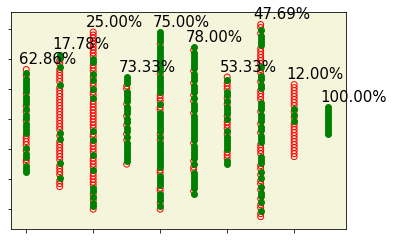

<Figure size 1440x1080 with 0 Axes>

Prediction # 48


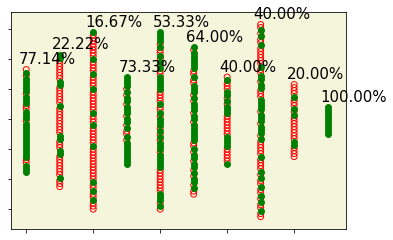

<Figure size 1440x1080 with 0 Axes>

Prediction # 49


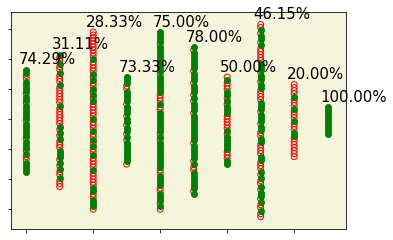

<Figure size 1440x1080 with 0 Axes>

Prediction # 50


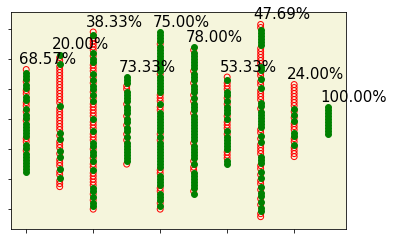

<Figure size 1440x1080 with 0 Axes>

Prediction # 51


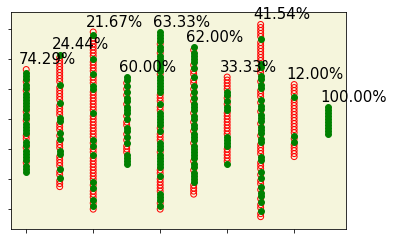

<Figure size 1440x1080 with 0 Axes>

Prediction # 52


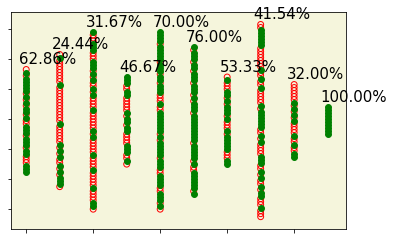

<Figure size 1440x1080 with 0 Axes>

Prediction # 53


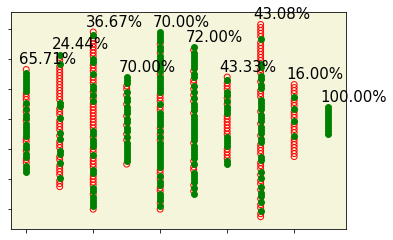

<Figure size 1440x1080 with 0 Axes>

Prediction # 54


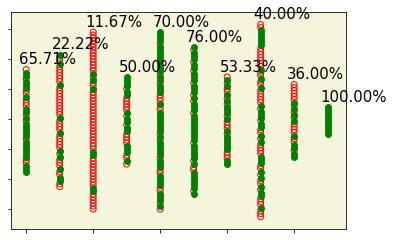

<Figure size 1440x1080 with 0 Axes>

Prediction # 55


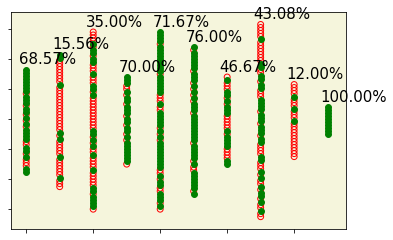

<Figure size 1440x1080 with 0 Axes>

Prediction # 56


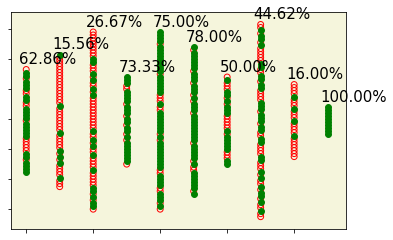

<Figure size 1440x1080 with 0 Axes>

Prediction # 57


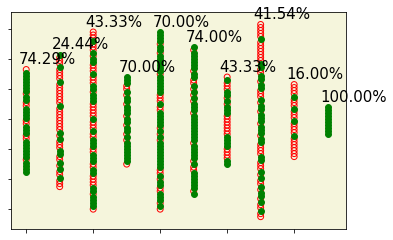

<Figure size 1440x1080 with 0 Axes>

Prediction # 58


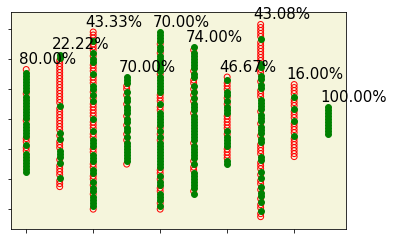

<Figure size 1440x1080 with 0 Axes>

Prediction # 59


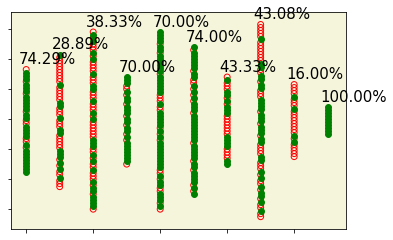

<Figure size 1440x1080 with 0 Axes>

Prediction # 60


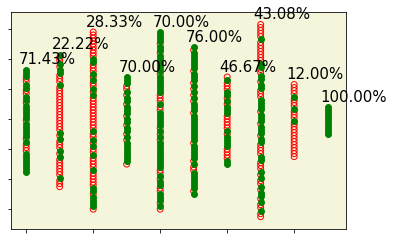

<Figure size 1440x1080 with 0 Axes>

Prediction # 61


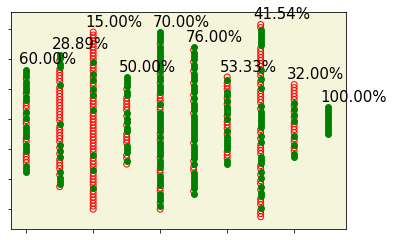

<Figure size 1440x1080 with 0 Axes>

Prediction # 62


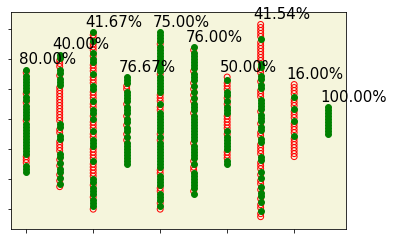

<Figure size 1440x1080 with 0 Axes>

Prediction # 63


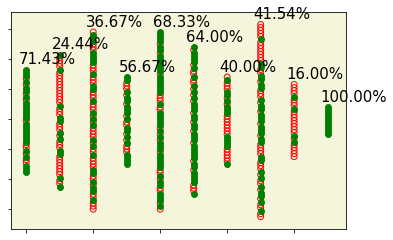

<Figure size 1440x1080 with 0 Axes>

Prediction # 64


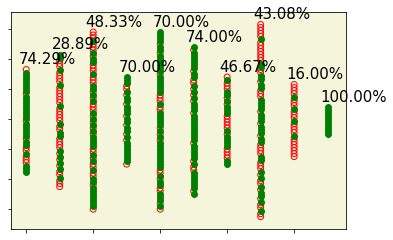

<Figure size 1440x1080 with 0 Axes>

Prediction # 65


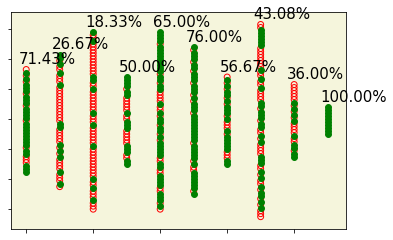

<Figure size 1440x1080 with 0 Axes>

Prediction # 66


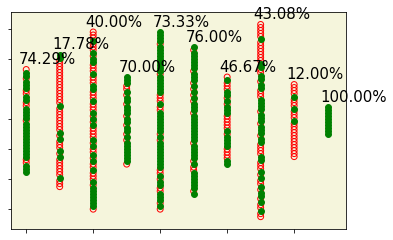

<Figure size 1440x1080 with 0 Axes>

Prediction # 67


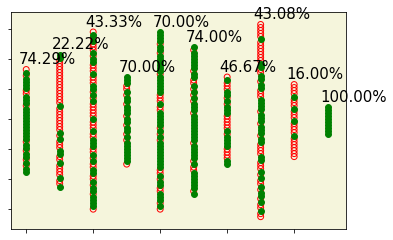

<Figure size 1440x1080 with 0 Axes>

Prediction # 68


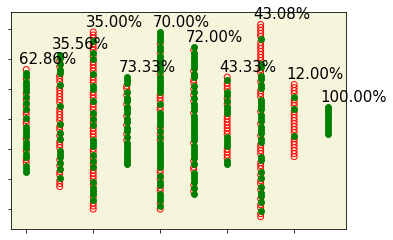

<Figure size 1440x1080 with 0 Axes>

Prediction # 69


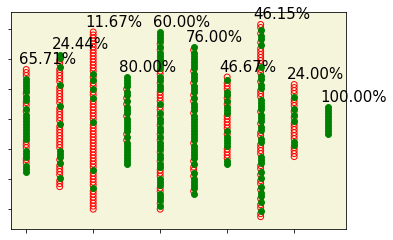

<Figure size 1440x1080 with 0 Axes>

Prediction # 70


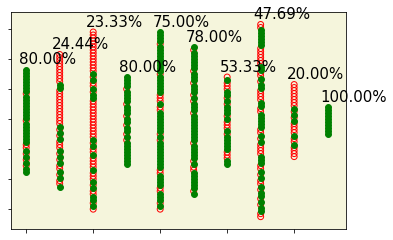

<Figure size 1440x1080 with 0 Axes>

Prediction # 71


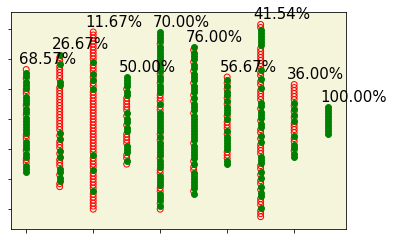

<Figure size 1440x1080 with 0 Axes>

Prediction # 72


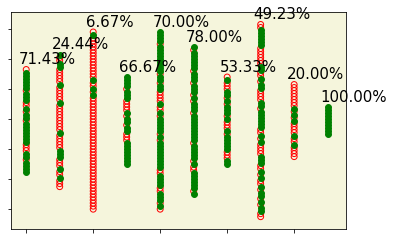

<Figure size 1440x1080 with 0 Axes>

Prediction # 73


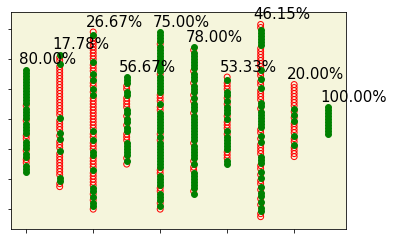

<Figure size 1440x1080 with 0 Axes>

Prediction # 74


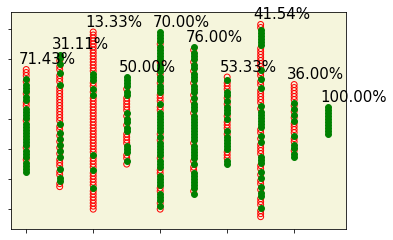

<Figure size 1440x1080 with 0 Axes>

Prediction # 75


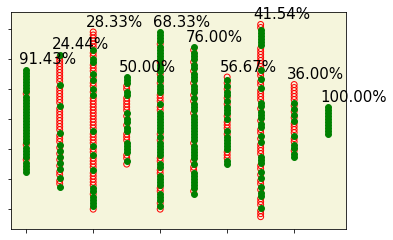

<Figure size 1440x1080 with 0 Axes>

Prediction # 76


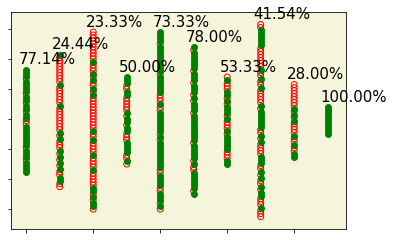

<Figure size 1440x1080 with 0 Axes>

Prediction # 77


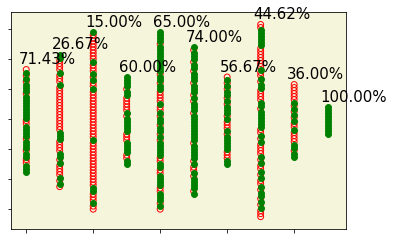

<Figure size 1440x1080 with 0 Axes>

Prediction # 78


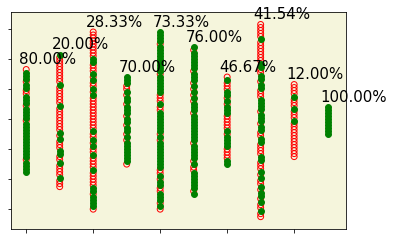

<Figure size 1440x1080 with 0 Axes>

Prediction # 79


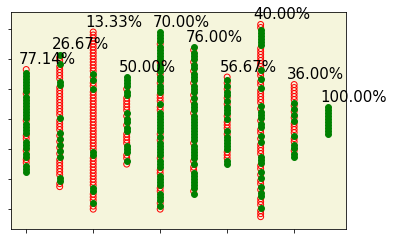

<Figure size 1440x1080 with 0 Axes>

Prediction # 80


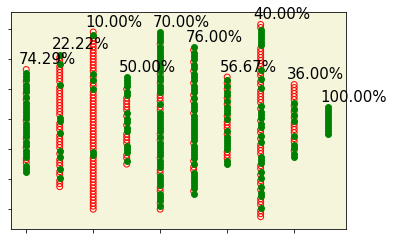

<Figure size 1440x1080 with 0 Axes>

Prediction # 81


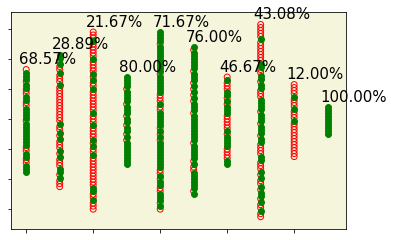

<Figure size 1440x1080 with 0 Axes>

Prediction # 82


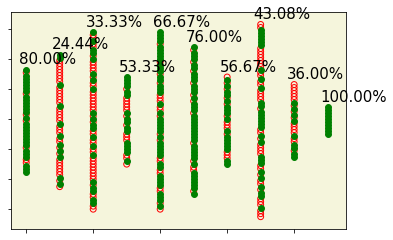

<Figure size 1440x1080 with 0 Axes>

Prediction # 83


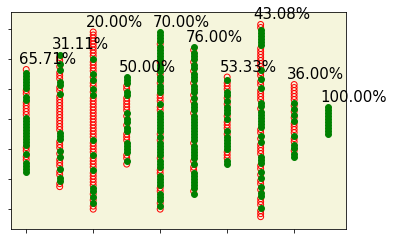

<Figure size 1440x1080 with 0 Axes>

Prediction # 84


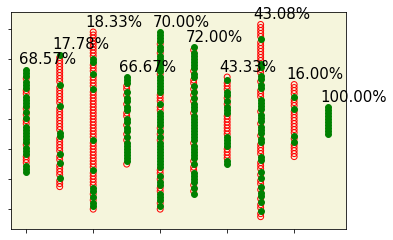

<Figure size 1440x1080 with 0 Axes>

Prediction # 85


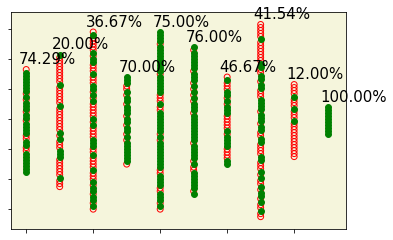

<Figure size 1440x1080 with 0 Axes>

Prediction # 86


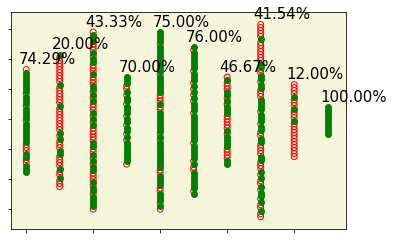

<Figure size 1440x1080 with 0 Axes>

Prediction # 87


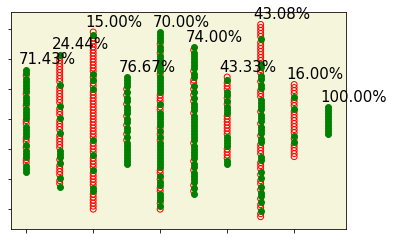

<Figure size 1440x1080 with 0 Axes>

Prediction # 88


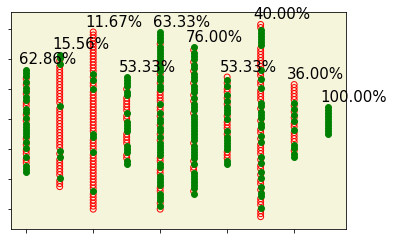

<Figure size 1440x1080 with 0 Axes>

Prediction # 89


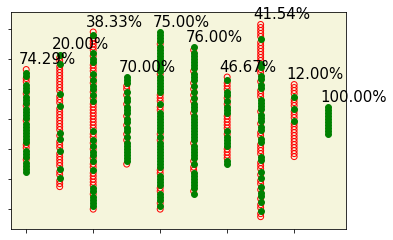

<Figure size 1440x1080 with 0 Axes>

Prediction # 90


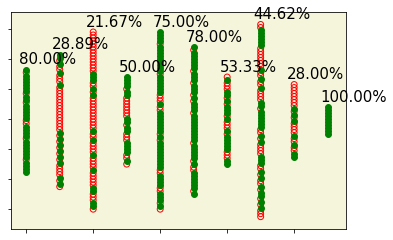

<Figure size 1440x1080 with 0 Axes>

Prediction # 91


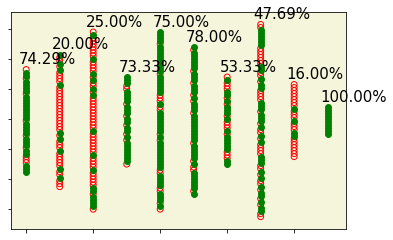

<Figure size 1440x1080 with 0 Axes>

Prediction # 92


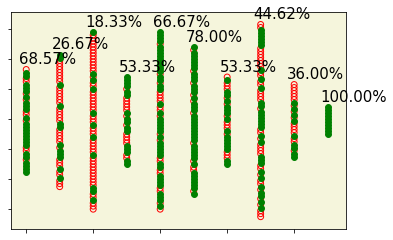

<Figure size 1440x1080 with 0 Axes>

Prediction # 93


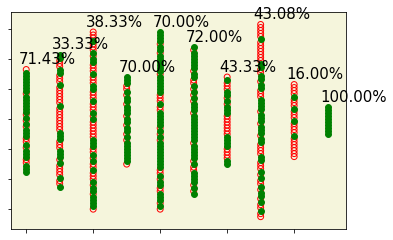

<Figure size 1440x1080 with 0 Axes>

Prediction # 94


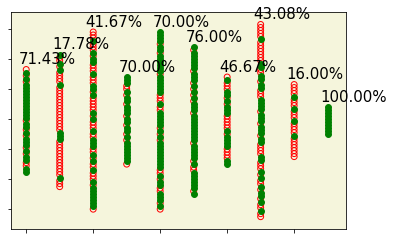

<Figure size 1440x1080 with 0 Axes>

Prediction # 95


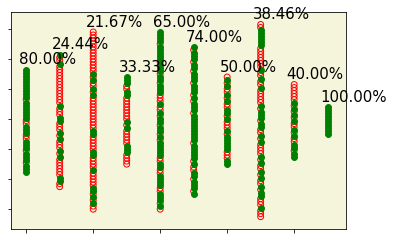

<Figure size 1440x1080 with 0 Axes>

Prediction # 96


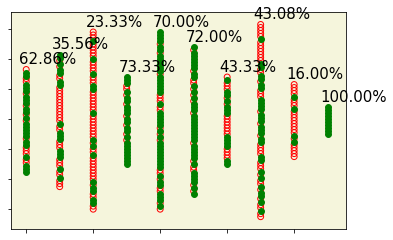

<Figure size 1440x1080 with 0 Axes>

Prediction # 97


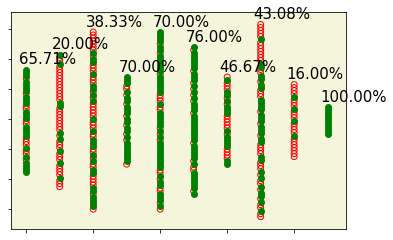

<Figure size 1440x1080 with 0 Axes>

Prediction # 98


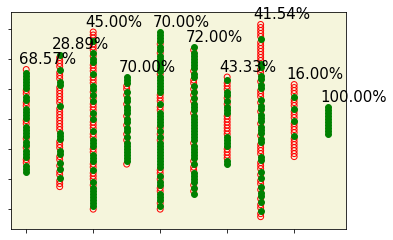

<Figure size 1440x1080 with 0 Axes>

Prediction # 99


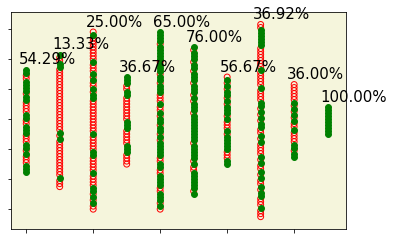

<Figure size 1440x1080 with 0 Axes>

Prediction # 100


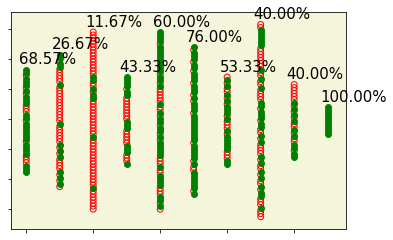

In [53]:
ctr = 0
for outputs in layerOutputs:
  ctr += 1
  fig = plt.figure(figsize=(20,15))
  plt.show()
  plt.title("Percentage of active units in the network", fontsize=30)
  axes = plt.gca()
  print("Prediction #",str(ctr))
  activationPlotter(outputs, axes)